# Бронирование билетов на Яндекс Афиша в июне-октябре 2024 года

Автор: Анастасия Таначева

Дата: 28.07.2025 - 29.07.2025

###### Цель: 

Выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, а также проверить гипотезы о разнице в поведении пользователей с мобильными и стационарными устройствами.

###### Задачи: 

I. Подготовка и исследовательский анализ данных 

II. Анализ пользовательских предпочтений и популярности событий

III. Проверка гипотез о поведении пользователей с мобильных и стационарных устройств

IV. Формулировка выводов и рекомендаций

# Описание данных

Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета соответствуют таблице purchases, с которой вы работали в предыдущих заданиях:
- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных.
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.

Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. Датасет содержит такие поля:
- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

Анализ данных в предыдущей части проекта показал, что выручка от заказов представлена в двух валютах — российских рублях и казахстанских тенге. Для удобства решения было бы корректно привести данные к одной валюте, например к российским рублям. 

Для этого в нашем распоряжении будет датасет final_tickets_tenge_df.csv с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
- nominal — номинал (100 тенге).
- data — дата.
- curs — курс тенге к рублю.
- cdx — обозначение валюты (kzt).

# Структура проекта

1) Загрузка данных и знакомство с ними

2) Предобработка данных и подготовка их к исследованию

3) Исследовательский анализ данных

4) Статистический анализ данных

5) Общий вывод и рекомендации

## Загрузка данных и знакомство с ними

### Импорт библиотек

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Чтение данных

In [150]:
df_tickets = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')

### Печать первых строк

In [151]:
display(df_tickets.head())
display(df_events.head())

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


### Подсчет строк

In [152]:
rows_tickets = df_tickets.shape[0]
rows_events = df_events.shape[0]

display(rows_tickets, rows_events)

290849

22427

Вывод: в датафрейме, содержащем информацию о билетах, содержится 290849 строк, в датафрейме с информацией о событиях - 22427 строк.

Датафрейм df_tickets включает информацию об идентификаторе заказа и пользователя, дате и времени создания заказа, идентификаторе события, типе устройства, выручке, названии сервиса, количестве билетов и общей сумме заказа. Также есть информация о количестве дней с предыдущего заказа пользователя, но есть пропуски. Требуется преобразование столбцов дат в соответствующий тип данных и обработка пропусков. В целом данные надлежащего качества.

Датафрейм df_events содержит информацию о событиях, включая идентификатор события, название события, описание типа события, основной тип события, информацию об организаторах, регионе, городе, идентификаторе города, идентификаторе места проведения и адресе места проведения. Данные выглядят в основном полными, но может потребоваться преобразование типа данных для столбца organizers и анализ столбцов с текстовой информацией.

## Предобработка данных и подготовка их к исследованию

### Определение типов данных

In [153]:
display(df_tickets.dtypes)

display(df_events.dtypes)

order_id                   int64
user_id                   object
created_dt_msk            object
created_ts_msk            object
event_id                   int64
cinema_circuit            object
age_limit                  int64
currency_code             object
device_type_canonical     object
revenue                  float64
service_name              object
tickets_count              int64
total                    float64
days_since_prev          float64
dtype: object

event_id                   int64
event_name                object
event_type_description    object
event_type_main           object
organizers                object
region_name               object
city_name                 object
city_id                    int64
venue_id                   int64
venue_name                object
venue_address             object
dtype: object

Вывод: в датафрейме df_tickets стоит привести столбцы created_dt_msk и created_ts_msk к типу данных datetime. В датафрейме df_events тип данных во всех столбцах оптимальный.

### Преобразование формата даты

In [154]:
df_tickets['created_dt_msk'] = pd.to_datetime(df_tickets['created_dt_msk'])
df_tickets['created_ts_msk'] = pd.to_datetime(df_tickets['created_ts_msk'])

### Поиск явных дубликатов и пропусков

In [155]:
missing_values = df_tickets.isnull().sum().sum()
duplicates = df_tickets.duplicated().sum()
print(missing_values, duplicates)

21940 0


In [156]:
missing_values = df_events.isnull().sum().sum()
duplicates = df_events.duplicated().sum()
print(missing_values, duplicates)

0 0


Вывод: датафрейм df_tickets содержит 21940 пропусков (явных дубликатов нет), в датафрейме df_events пропусков и дубликатов не обнаружено.

### Проверим, в каком столбце есть пропуски

In [157]:
df_tickets.isnull().sum()

order_id                     0
user_id                      0
created_dt_msk               0
created_ts_msk               0
event_id                     0
cinema_circuit               0
age_limit                    0
currency_code                0
device_type_canonical        0
revenue                      0
service_name                 0
tickets_count                0
total                        0
days_since_prev          21940
dtype: int64

Вывод: как и оговаривалось изначально, пропуски есть только в столбце days_since_prev. Их число невелико (относительно кол-ва строк в датафрейме), поэтому оставим пропуски как есть.

In [158]:
df_rub = df_tickets[df_tickets['currency_code'] == 'rub'].copy()
df_kzt = df_tickets[df_tickets['currency_code'] == 'kzt'].copy()
print("Анализ revenue (RUB):")
print(df_rub['revenue'].describe())

Анализ revenue (RUB):
count    285780.000000
mean        547.568333
std         871.524559
min         -90.760000
25%         113.827500
50%         346.100000
75%         791.700000
max       81174.540000
Name: revenue, dtype: float64


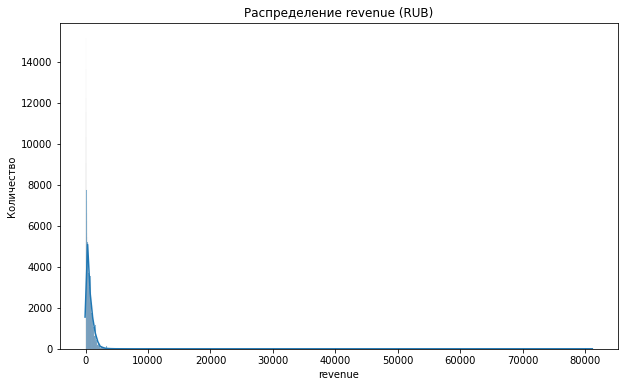

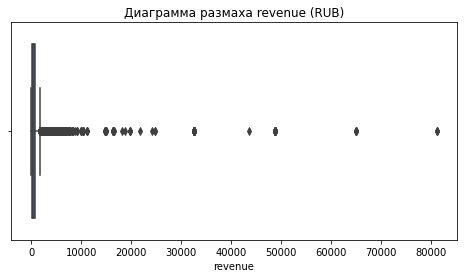

In [159]:
# Гистограмма распределения revenue (рубли)
plt.figure(figsize=(10, 6))
sns.histplot(df_rub['revenue'], kde=True)
plt.title("Распределение revenue (RUB)")
plt.xlabel("revenue")
plt.ylabel("Количество")
plt.show()

# Диаграмма размаха revenue (рубли)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rub['revenue'])
plt.title("Диаграмма размаха revenue (RUB)")
plt.show()

Вывод: 
1) Диаграмма "Распределение revenue (RUB)":

•  Распределение сильно скошено вправо. Это означает, что большинство значений выручки сосредоточены в левой части графика (близко к 0), а меньшее количество значений простирается вправо на более высокие значения выручки.

•  Имеется пик (мода) в районе 0 - 5 000 RUB. Это указывает на то, что большинство заказов приносят относительно небольшую выручку.

•  По мере продвижения вправо по оси X (увеличения выручки) количество наблюдений быстро уменьшается.

•  Есть небольшое количество заказов с очень высокой выручкой (далеко справа на оси X), но они встречаются крайне редко.

2) Диаграмма размаха

•  Медиана: медиана находится в районе 1000-2000.

•  Ящик: ящик довольно узкий, и находится в районе до 5000. Это означает, что 50% данных (между Q1 и Q3) сконцентрированы в этом узком диапазоне.

•  Усы: ус слева начинается около 0 и упирается в левую границу ящика, т.к. там и сконцентрировано большинство данных. Ус справа тянется до 10000.

•  Выбросы: диаграмма содержит значительное количество выбросов за пределами усов, простирающихся вплоть до 80 000. Это означает, что либо существуют заказы со значительно более высокой выручкой, чем у большинства, либо в данных содержатся ошибки, вызванные скорее всего тем, что в базу данные были внесены неправильно.

In [160]:
# Выбросы revenue (рубли) - отбор по 99-му процентилю
revenue_99_rub = df_rub['revenue'].quantile(0.99)
print(f"n99-й процентиль revenue (RUB): {revenue_99_rub}")

df_rub_filtered = df_rub[df_rub['revenue'] <= revenue_99_rub]
print("nРазмер DataFrame до фильтрации revenue (RUB):", len(df_rub))
print("Размер DataFrame после фильтрации revenue (RUB):", len(df_rub_filtered))

n99-й процентиль revenue (RUB): 2569.5942000000005
nРазмер DataFrame до фильтрации revenue (RUB): 285780
Размер DataFrame после фильтрации revenue (RUB): 282922


In [161]:
# 3. Анализ tickets_count (рубли)
print("nАнализ tickets_count (RUB):")
print(df_rub['tickets_count'].describe())

nАнализ tickets_count (RUB):
count    285780.000000
mean          2.754077
std           1.171419
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          57.000000
Name: tickets_count, dtype: float64


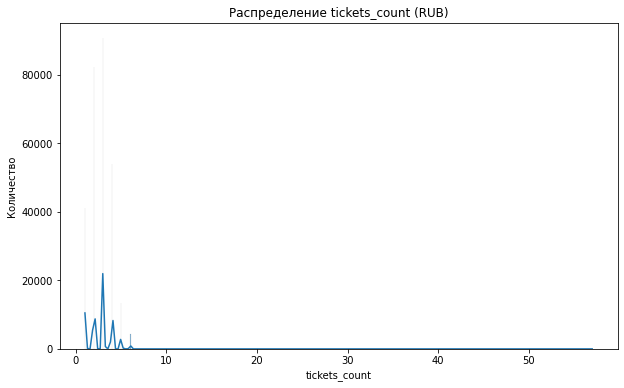

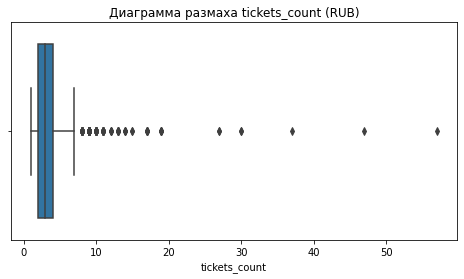

In [162]:
# Гистограмма распределения tickets_count (рубли)
plt.figure(figsize=(10, 6))
sns.histplot(df_rub['tickets_count'], kde=True)
plt.title("Распределение tickets_count (RUB)")
plt.xlabel("tickets_count")
plt.ylabel("Количество")
plt.show()

# Диаграмма размаха tickets_count (рубли)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_rub['tickets_count'])
plt.title("Диаграмма размаха tickets_count (RUB)")
plt.show()

Выводы:

1) Диаграмма "Распределение tickets_count (RUB)":

Анализ распределения:

График показывает распределение количества билетов (tickets_count). Видно, что большая часть значений сосредоточена в начале графика (то есть, небольшое количество билетов). Пики показывают, что есть определенные значения количества билетов, которые встречаются чаще других.

2) Диаграмма размаха:

•  Ящик диаграммы расположен близко к значению 0, что указывает на то, что большая часть данных о количестве билетов сосредоточена в этом диапазоне.

•  Множество выбросов свидетельствует о наличии случаев с большим количеством билетов, которые можно считать нетипичными.

nАнализ revenue (KZT):
count     5069.000000
mean      4995.206767
std       4916.752776
min          0.000000
25%        518.100000
50%       3698.830000
75%       7397.660000
max      26425.860000
Name: revenue, dtype: float64


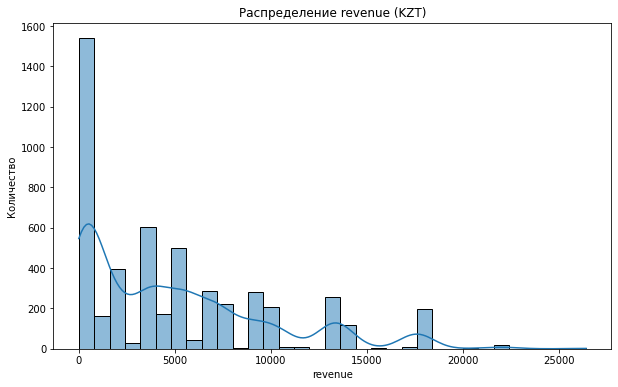

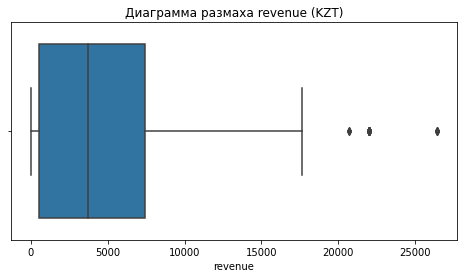

n99-й процентиль revenue (KZT): 17617.24
nРазмер DataFrame до фильтрации revenue (KZT): 5069
Размер DataFrame после фильтрации revenue (KZT): 5040


In [163]:
# Анализ revenue (тенге)
print("nАнализ revenue (KZT):")
print(df_kzt['revenue'].describe())

# Гистограмма распределения revenue (тенге)
plt.figure(figsize=(10, 6))
sns.histplot(df_kzt['revenue'], kde=True)
plt.title("Распределение revenue (KZT)")
plt.xlabel("revenue")
plt.ylabel("Количество")
plt.show()

# Диаграмма размаха revenue (тенге)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_kzt['revenue'])
plt.title("Диаграмма размаха revenue (KZT)")
plt.show()

# Выбросы revenue (тенге) - отбор по 99-му процентилю
revenue_99_kzt = df_kzt['revenue'].quantile(0.99)
print(f"n99-й процентиль revenue (KZT): {revenue_99_kzt}")

df_kzt_filtered = df_kzt[df_kzt['revenue'] <= revenue_99_kzt]
print("nРазмер DataFrame до фильтрации revenue (KZT):", len(df_kzt))
print("Размер DataFrame после фильтрации revenue (KZT):", len(df_kzt_filtered))

Выводы:

1) Диаграмма "Распределение revenue (KZT)":

•  Распределение revenue имеет высокую частоту для низких значений доходов.

•  В начале диаграммы (0-5000) видна большая колонка, а далее по мере увеличения дохода колонок становится всё меньше и меньше.

•  Видна кривая, наложенная на гистограмму, которая помогает визуализировать общую форму распределения.

2) Диаграмма размаха:

Диаграмма размаха показывает, что основная часть значений доходов (revenue) находится в диапазоне от 0 до примерно 5000. Есть выбросы с более высокими значениями. Фильтрация данных привела к незначительному сокращению количества строк, возможно, из-за удаления некоторых экстремальных значений.

nАнализ tickets_count (KZT):
count    5069.000000
mean        2.762872
std         1.115558
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: tickets_count, dtype: float64


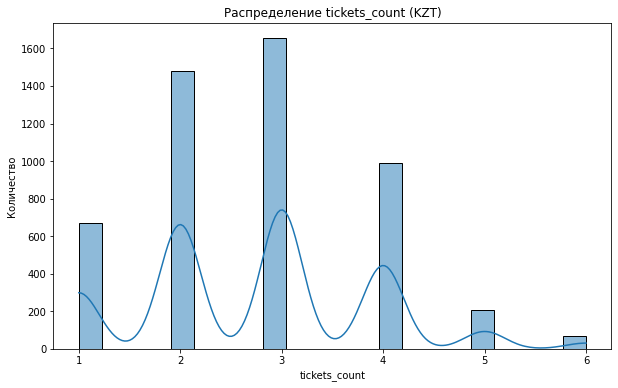

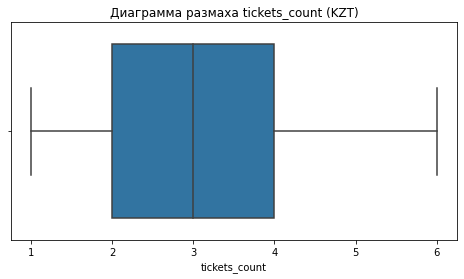

In [164]:
print("nАнализ tickets_count (KZT):")
print(df_kzt['tickets_count'].describe())

# Гистограмма распределения tickets_count (тенге)
plt.figure(figsize=(10, 6))
sns.histplot(df_kzt['tickets_count'], kde=True)
plt.title("Распределение tickets_count (KZT)")
plt.xlabel("tickets_count")
plt.ylabel("Количество")
plt.show()

# Диаграмма размаха tickets_count (тенге)
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_kzt['tickets_count'])
plt.title("Диаграмма размаха tickets_count (KZT)")
plt.show()

Выводы:

1) Диаграмма "Распределение tickets_count (KZT)":

Анализ распределения:

График показывает, что большинство пользователей предпочитают покупать небольшое количество билетов (2 или 3). Покупки 1 или 4 билетов тоже довольно распространены, в то время как покупки 5 или 6 билетов являются редкими. Судя по мультимодальности, возможно, есть несколько различных групп пользователей с разными паттернами покупок.

2) Диаграмма размаха:

Диаграмма размаха предоставляет краткую информацию о распределении количества билетов. Она подтверждает, что большинство покупателей заказывают от 2 до 4 билетов, и в целом распределение довольно симметричное.

### Поиск неявных дубликатов

In [165]:
booking_columns = ['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
                   'cinema_circuit', 'age_limit', 'currency_code',
                   'device_type_canonical', 'revenue', 'service_name','total']

# Создаем новый столбец, объединяющий значения выбранных столбцов в одну строку
df_tickets['booking_signature'] = df_tickets[booking_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)

# Считаем количество уникальных значений в столбце booking_signature
print("Количество уникальных бронирований (booking_signature):", df_tickets['booking_signature'].nunique())

# Считаем, сколько раз встречается каждая booking_signature
booking_counts = df_tickets['booking_signature'].value_counts()

# Выводим booking_signatures, которые встречаются более одного раза (неявные дубликаты)
duplicate_bookings = booking_counts[booking_counts > 1]
print("\nНеявные дубликаты бронирований (booking_signature):\n", duplicate_bookings)

# Выводим строки, которые соответствуют неявным дубликатам
duplicate_rows = df_tickets[df_tickets['booking_signature'].isin(duplicate_bookings.index)]
print("\nСтроки, соответствующие неявным дубликатам:\n", duplicate_rows)

Количество уникальных бронирований (booking_signature): 290807

Неявные дубликаты бронирований (booking_signature):
 7eb4fc207ecc10f_2024-08-23 00:00:00_2024-08-23 14:08:19_298035_нет_6_rub_mobile_126.84_Билеты без проблем_3170.95        3
fd4d47438ebb946_2024-06-19 00:00:00_2024-06-19 15:40:56_489843_нет_18_rub_desktop_1319.43_Билеты без проблем_14660.31    3
c2c6d35ff678ca6_2024-08-06 00:00:00_2024-08-06 13:26:42_379268_нет_0_rub_mobile_87.02_Билеты без проблем_4350.98         3
8d6c1ff89fac35f_2024-10-31 00:00:00_2024-10-31 22:28:57_589624_нет_16_rub_desktop_41.83_Мой билет_1045.75                2
cfd21a3210b5a35_2024-10-07 00:00:00_2024-10-07 12:15:35_546910_нет_16_rub_mobile_884.73_Весь в билетах_8847.26           2
3ee7dc2e115847f_2024-06-25 00:00:00_2024-06-25 07:32:08_277504_нет_6_rub_mobile_59.19_Билеты в руки_739.85               2
7eb4fc207ecc10f_2024-10-26 00:00:00_2024-10-26 09:39:03_418836_нет_0_rub_mobile_294.85_Лови билет!_4914.21               2
7eb4fc207ecc10f_2024-0

In [166]:
# Определяем столбцы, которые описывают бронирование (без order_id)
booking_columns = ['event_id', 'event_name', 'event_type_description', 'event_type_main', 'organizers', 'region_name', 'city_name', 'venue_id', 'venue_name', 'venue_address']

# Создаем новый столбец, объединяющий значения выбранных столбцов в одну строку
df_events['booking_events'] = df_events[booking_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)

# Считаем количество уникальных значений в столбце booking_signature
print("Количество уникальных бронирований (booking_events):", df_events['booking_events'].nunique())

# Считаем, сколько раз встречается каждая booking_signature
booking_counts = df_events['booking_events'].value_counts()

# Выводим booking_signatures, которые встречаются более одного раза (неявные дубликаты)
duplicate_bookings = booking_counts[booking_counts > 1]
print("\nНеявные дубликаты бронирований (booking_signature):\n", duplicate_bookings)

# Выводим строки, которые соответствуют неявным дубликатам
duplicate_rows = df_events[df_events['booking_events'].isin(duplicate_bookings.index)]
print("\nСтроки, соответствующие неявным дубликатам:\n", duplicate_rows)

Количество уникальных бронирований (booking_events): 22427

Неявные дубликаты бронирований (booking_signature):
 Series([], Name: booking_events, dtype: int64)

Строки, соответствующие неявным дубликатам:
 Empty DataFrame
Columns: [event_id, event_name, event_type_description, event_type_main, organizers, region_name, city_name, city_id, venue_id, venue_name, venue_address, booking_events]
Index: []


In [167]:
# В датафрейме df_tickets выявлено 42 дубликата, удалим их
df_tickets_1 = df_tickets.drop_duplicates(subset=['booking_signature'], keep='first')
print("\nРазмер DataFrame после удаления неявных дубликатов:", len(df_tickets_1))


Размер DataFrame после удаления неявных дубликатов: 290807


### Обратимся к третьему датафрейму final_tickets_tenge_df.csv 

In [168]:
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

df_tenge['data'] = pd.to_datetime(df_tenge['data'], errors='coerce')

In [169]:
# 1. Приведение выручки к рублям
df_tickets_2 = df_tickets_1.copy()

def convert_to_rub(row):
    if row['currency_code'] == 'rub':
        return row['revenue']
    elif row['currency_code'] == 'kzt':
        # Находим курс тенге на дату заказа
        rate = df_tenge[df_tenge['data'] == row['created_dt_msk']]['curs'].values
        if len(rate) > 0:
            return row['revenue'] / 100 * rate[0]  # Делим на 100, т.к. курс за 100 тенге
        else:
            return None  # Если курс не найден, возвращаем None
    else:
        return None

# Применяем функцию для создания столбца revenue_rub
df_tickets_2['revenue_rub'] = df_tickets_2.apply(convert_to_rub, axis=1)

In [170]:
# 2. Выручка с одного билета (one_ticket_revenue_rub)
df_tickets_2['one_ticket_revenue_rub'] = df_tickets_2['revenue_rub'] / df_tickets_2['tickets_count'].copy()

In [171]:
# 3. Месяц оформления заказа (month)
df_tickets_2['month'] = df_tickets_2['created_dt_msk'].dt.month.copy()

In [172]:
# 4. Сезон (season)
def get_season(month):
    if 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    elif 9 <= month <= 11:
        return 'осень'
    else:
        return 'зима'

df_tickets_2['season'] = df_tickets_2['month'].apply(get_season)

In [173]:
display("\nИнформация о DataFrame после преобразований:")
display(df_tickets_2.info())

display("\nПервые 5 строк DataFrame после преобразований:")
display(df_tickets_2.head())

'\nИнформация о DataFrame после преобразований:'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290807 entries, 0 to 290848
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                290807 non-null  int64         
 1   user_id                 290807 non-null  object        
 2   created_dt_msk          290807 non-null  datetime64[ns]
 3   created_ts_msk          290807 non-null  datetime64[ns]
 4   event_id                290807 non-null  int64         
 5   cinema_circuit          290807 non-null  object        
 6   age_limit               290807 non-null  int64         
 7   currency_code           290807 non-null  object        
 8   device_type_canonical   290807 non-null  object        
 9   revenue                 290807 non-null  float64       
 10  service_name            290807 non-null  object        
 11  tickets_count           290807 non-null  int64         
 12  total                   290807

None

'\nПервые 5 строк DataFrame после преобразований:'

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,booking_signature,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN,0002849b70a3ce2_2024-08-20 00:00:00_2024-08-20...,1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN,0005ca5e93f2cf4_2024-07-23 00:00:00_2024-07-23...,289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0,0005ca5e93f2cf4_2024-10-06 00:00:00_2024-10-06...,1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN,000898990054619_2024-07-13 00:00:00_2024-07-13...,8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0,000898990054619_2024-10-04 00:00:00_2024-10-04...,1390.41,463.4700,10,осень


In [174]:
# Объединим датафреймы df_tickets_1 и df_events
df_merged = pd.merge(df_tickets_2, df_events, on='event_id', how='left')

Вывод: к исходному датафрейму добавились такие столбцы, как booking_signature, revenue_rub (содержит данные о выручке с заказа в рублях), one_ticket_revenue_rub  (выручка с продажи одного билета), month (месяц оформления заказа), season (данные о сезонности).

После добавления новых столбцов в очищенный датафрейм df_tickets_2 объединили его с датафреймом df_events.

In [175]:
initial_rows = len(df_tickets)
processed_rows = len(df_tickets_2)

rows_difference = initial_rows - processed_rows
percentage_removed = (rows_difference / initial_rows) * 100

print(f"Доля удалённых строк после предобработки: {percentage_removed:.2f}%")

Доля удалённых строк после предобработки: 0.01%


## Исследовательский анализ данных

### 3.1. Анализ распределения заказов по сегментам и их сезонные изменения


Количество заказов по месяцам:
 month
6      34675
7      40922
8      45034
9      69971
10    100205
Name: order_id, dtype: int64


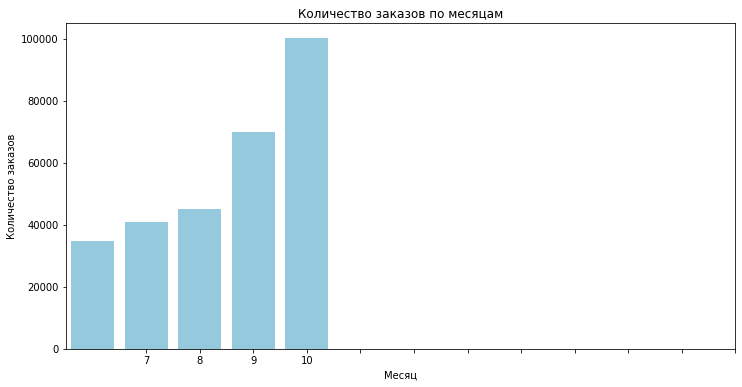

In [176]:
# 2. Группировка по месяцам и подсчет количества заказов
orders_per_month = df_merged.groupby('month')['order_id'].count()

print("\nКоличество заказов по месяцам:\n", orders_per_month)

# 3. Визуализация результатов
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_per_month.index, y=orders_per_month.values, color='skyblue')
plt.title("Количество заказов по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Количество заказов")
plt.xticks(range(1, 13))
plt.show()

Пояснение: количество заказов увеличивается от месяца к месяцу, достигая максимума в октябре.

- Месяцы:

•  Июнь (6): около 35 000 заказов.

•  Июль (7): около 40 000 заказов.

•  Август (8): около 45 000 заказов.

•  Сентябрь (9): около 70 000 заказов.

•  Октябрь (10): около 100 000 заказов.

Вывод: наблюдается выраженная сезонность: количество заказов значительно увеличивается в осенние месяцы, достигая пика в октябре. Спрос также увеличивается в течение осеннего периода.

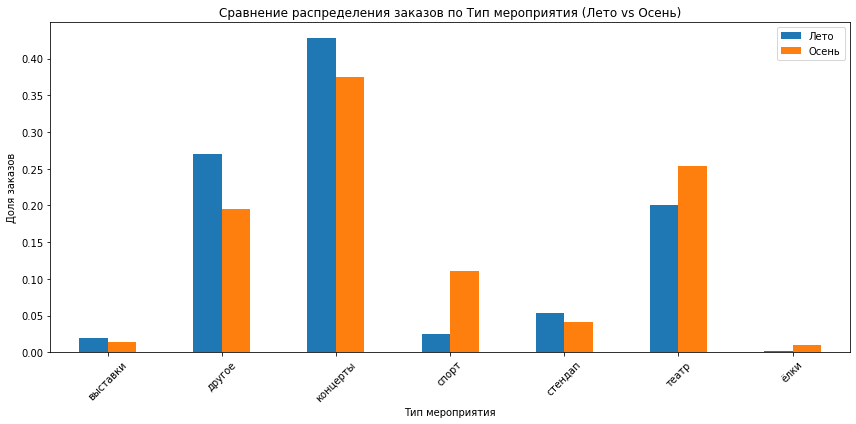

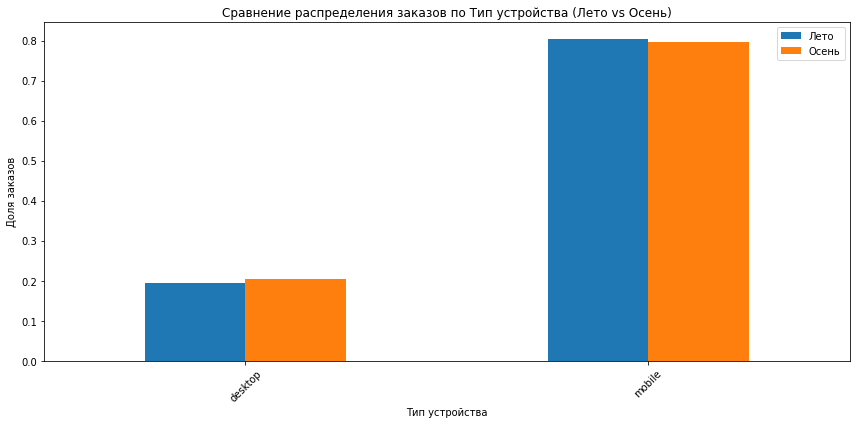

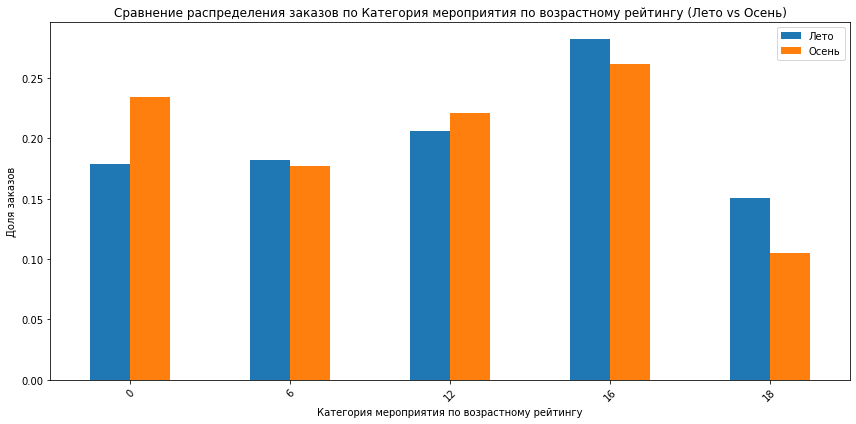

In [177]:
# 1. Определение категорий для анализа
categories = {
    'event_type_main': 'Тип мероприятия',
    'device_type_canonical': 'Тип устройства',
    'age_limit': 'Категория мероприятия по возрастному рейтингу'
}

# 2. Фильтрация данных по сезонам
df_summer = df_merged[df_merged['season'] == 'лето']
df_autumn = df_merged[df_merged['season'] == 'осень']

# 3. Анализ и визуализация для каждой категории
for column, label in categories.items():
    # Расчет долей для лета
    summer_counts = df_summer[column].value_counts(normalize=True)
    summer_counts = summer_counts.sort_index()

    # Расчет долей для осени
    autumn_counts = df_autumn[column].value_counts(normalize=True)
    autumn_counts = autumn_counts.sort_index()

    # Объединение данных для визуализации
    df_comparison = pd.DataFrame({
        'Лето': summer_counts,
        'Осень': autumn_counts
    })

    # Визуализация (столбчатая диаграмма)
    df_comparison.plot(kind='bar', figsize=(12, 6), rot=45)
    plt.title(f'Сравнение распределения заказов по {label} (Лето vs Осень)')
    plt.xlabel(label)
    plt.ylabel('Доля заказов')
    plt.tight_layout()
    plt.show()

Пояснения: 

1) Диаграмма "Сравнение распределения заказов по типу мероприятия"

Диаграмма сравнивает долю заказов на различные типы мероприятий летом и осенью.

•  Концерты: явно преобладают летом, доля заказов на концерты значительно выше, чем осенью.

•  Театр: доля заказов на театр значительно выше осенью, чем летом.

•  Другое: высокая доля заказов на "другие" мероприятия летом, осенью доля чуть меньше.

•  Спорт: большая доля заказов осенью по сравнению с летом.

•  Выставки, Стендап, Елки: небольшая доля заказов и летом, и осенью, но для "ёлок" доля осенью немного больше.


Выводы:

    •  Наблюдаются значительные изменения в предпочтениях по типу мероприятий в зависимости от сезона.

    •  Концерты более популярны летом, а театр, спорт - осенью.

    •  "Другое" имеет достаточно высокую долю как летом, так и осенью.
    

2) Диаграмма "Сравнение распределения заказов по типу устройства"

Диаграмма сравнивает доли заказов, сделанных с разных типов устройств, летом и осенью.

•  Mobile: доля заказов с мобильных устройств значительно выше, чем с десктопов, и летом, и осенью.

•  Desktop: доля заказов с десктопов значительно ниже, чем с мобильных, и летом, и осенью.

•  Сезонность: доля заказов с мобильных устройств немного выше осенью, чем летом. Доля заказов с десктопов осенью чуть меньше, чем летом.


Выводы:

    •  Мобильные устройства являются основным каналом для заказов, доля заказов с мобильных устройств значительно больше, чем с десктопов.

    •  Доля заказов с мобильных устройств немного увеличивается осенью, что может говорить об увеличении активности пользователей мобильных устройств в осенний период.
    

3) Диаграмма "Сравнение распределения заказов по возрастному рейтингу"

Диаграмма сравнивает доли заказов на мероприятия с разными возрастными рейтингами летом и осенью.

•  Рейтинг 0: доля заказов выше осенью, чем летом.

•  Рейтинг 16: самая высокая доля заказов летом, осенью доля немного меньше, но все равно остается высокой.

•  Рейтинги 6, 12: доли заказов примерно одинаковые летом и осенью.

•  Рейтинг 18: доля заказов меньше, чем у других рейтингов, но летом доля выше, чем осенью.


Выводы:

    •  Наблюдаются различия в предпочтениях по возрастному рейтингу мероприятий в зависимости от сезона.

    •  Мероприятия с рейтингом 0 (без возрастных ограничений), возможно, более популярны осенью.

    •  Мероприятия с рейтингом 16 наиболее популярны, а летом доля таких мероприятий выше, чем осенью.

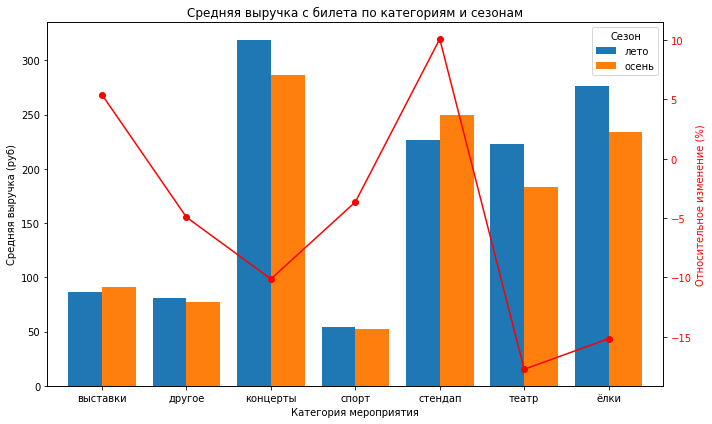


Средняя выручка с билета по категориям и сезонам:
 season                 лето       осень  relative_change
event_type_main                                         
выставки          86.416198   91.066619         5.381423
другое            81.097332   77.097947        -4.931586
концерты         319.075261  286.756736       -10.128809
спорт             54.112065   52.139437        -3.645448
стендап          227.070677  249.963862        10.081964
театр            222.524554  183.061214       -17.734375
ёлки             276.388228  234.503838       -15.154187


In [178]:
# 1. Расчет средней выручки с билета по категориям мероприятий и сезонам
seasonal_revenue = df_merged.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().unstack()

# 2. Расчет относительного изменения выручки (осень vs лето)
seasonal_revenue['relative_change'] = ((seasonal_revenue['осень'] - seasonal_revenue['лето']) / seasonal_revenue['лето']) * 100

# 3. Визуализация результатов

# 3.1 Столбчатая диаграмма для сравнения средней выручки
fig, ax1 = plt.subplots(figsize=(10, 6))
seasonal_revenue[['лето', 'осень']].plot(kind='bar', rot=0, ax=ax1, width=0.8)
ax1.set_title('Средняя выручка с билета по категориям и сезонам')
ax1.set_xlabel('Категория мероприятия')
ax1.set_ylabel('Средняя выручка (руб)')
ax1.legend(title='Сезон')

# 3.2 Столбчатая диаграмма для относительного изменения (справа)
ax2 = ax1.twinx()  # Создаем вторую ось, разделяющую X
seasonal_revenue['relative_change'].plot(kind='line', rot=0, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Относительное изменение (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()


# 4. Вывод результатов
print("\nСредняя выручка с билета по категориям и сезонам:\n", seasonal_revenue)

Пояснения:

Диаграмма показывает среднюю выручку с билета для разных категорий мероприятий летом и осенью, а также относительное изменение выручки между сезонами.

•  Высокая выручка: самая высокая средняя выручка с билета наблюдается на "концертах" и "ёлках".

•  Низкая выручка: самая низкая средняя выручка с билета наблюдается на "спорте".

•  Относительное изменение: красная линия (относительное изменение) показывает:

    •  Увеличение выручки осенью по сравнению с летом на "выставках", "стендапе" и "ёлках".

    •  Уменьшение выручки осенью по сравнению с летом на "другом", "концертах" и "театре".

    •  Выручка на "спорте" практически не изменилась между сезонами.

Выводы:

    •  Концерты и Ёлки, в среднем, приносят наибольшую выручку с билета.

    •  Наблюдаются значительные сезонные различия в выручке для разных категорий мероприятий.

    •  В некоторых категориях ("выставки", "стендап", "ёлки") выручка с билета осенью выше, чем летом. В других ("другое", "концерты", "театр") - ниже.

### 3.2. Осенняя активность пользователей

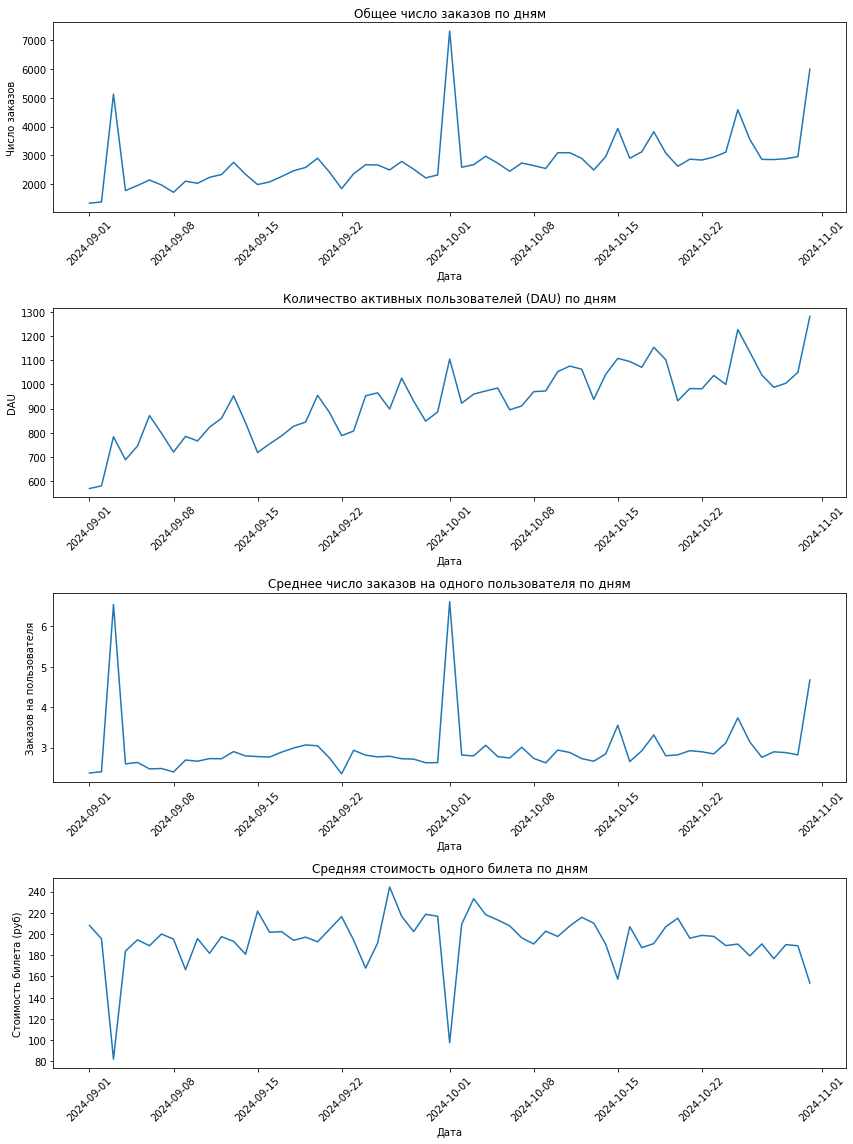

                total_orders  unique_users  total_revenue  orders_per_user  \
created_dt_msk                                                               
2024-09-01              1348           569  280542.410424         2.369069   
2024-09-02              1391           580  271990.700672         2.398276   
2024-09-03              5124           783  420656.984619         6.544061   
2024-09-04              1785           688  328445.984143         2.594477   
2024-09-05              1960           745  381245.801635         2.630872   
...                      ...           ...            ...              ...   
2024-10-27              2865          1039  546322.838926         2.757459   
2024-10-28              2859           988  505424.894779         2.893725   
2024-10-29              2888          1005  548864.344588         2.873632   
2024-10-30              2960          1050  559276.119368         2.819048   
2024-10-31              5991          1282  922062.404307       

In [179]:
# 1. Предобработка данных
# Фильтруем данные, оставляя только осенние месяцы 2024 года (сентябрь и октябрь)
df = df_merged[(df_merged['created_dt_msk'].dt.year == 2024) & (df_merged['created_dt_msk'].dt.month.isin([9, 10]))]

# 2. Создание сводной таблицы
# Группируем данные по дням и считаем необходимые показатели
daily_summary = df.groupby(df['created_dt_msk'].dt.date).agg(
    total_orders=('order_id', 'count'),
    unique_users=('user_id', 'nunique'),       
    total_revenue=('one_ticket_revenue_rub', 'sum'),
)

# Рассчитываем среднее число заказов на одного пользователя
daily_summary['orders_per_user'] = daily_summary['total_orders'] / daily_summary['unique_users']

# Рассчитываем среднюю стоимость одного билета
daily_summary['avg_ticket_price'] = daily_summary['total_revenue'] / daily_summary['total_orders']

# 3. Визуализация данных
fig, axes = plt.subplots(4, 1, figsize=(12, 16))

# График общего числа заказов
axes[0].plot(daily_summary.index, daily_summary['total_orders'])
axes[0].set_title('Общее число заказов по дням')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Число заказов')
axes[0].tick_params(axis='x', rotation=45)

# График количества активных пользователей (DAU)
axes[1].plot(daily_summary.index, daily_summary['unique_users'])
axes[1].set_title('Количество активных пользователей (DAU) по дням')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('DAU')
axes[1].tick_params(axis='x', rotation=45)

# График среднего числа заказов на одного пользователя
axes[2].plot(daily_summary.index, daily_summary['orders_per_user'])
axes[2].set_title('Среднее число заказов на одного пользователя по дням')
axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Заказов на пользователя')
axes[2].tick_params(axis='x', rotation=45)

# График средней стоимости одного билета
axes[3].plot(daily_summary.index, daily_summary['avg_ticket_price'])
axes[3].set_title('Средняя стоимость одного билета по дням')
axes[3].set_xlabel('Дата')
axes[3].set_ylabel('Стоимость билета (руб)')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 4. Вывод результатов (опционально)
print(daily_summary)

Пояснения:

1) Диаграмма "Общее число заказов по дням"

Диаграмма показывает динамику общего числа заказов по дням в течение осеннего периода 2024 года.

•  Общий тренд: наблюдается общее увеличение числа заказов к концу периода.

•  Пики: присутствуют несколько пиков в числе заказов в разные дни, самые большие 1 октября и 1 ноября.

•  Волатильность: наблюдается некоторая волатильность (колебания) в количестве заказов изо дня в день.


Выводы:

    •  Общее число заказов имеет тенденцию к росту в течение осеннего периода.

    •  Присутствуют пики в определенные дни, что может указывать на события или активности, приводящие к увеличению спроса.

    •  Анализ динамики числа заказов по дням позволяет выявить факторы, влияющие на спрос и планировать маркетинговые активности.
    
    
2) Диаграмма "Количество активных пользователей по дням"

Диаграмма отображает динамику ежедневной активной аудитории (DAU) в течение осеннего периода 2024 года.

•  Общий тренд: наблюдается общий восходящий тренд, то есть DAU увеличивается со временем.

•  Волатильность: присутствуют колебания DAU изо дня в день.

•  Рост к концу периода: к концу рассматриваемого периода (октябрь-начало ноября) наблюдается более выраженный рост DAU.

Выводы:

    •  Ежедневная активная аудитория демонстрирует положительную динамику в течение осеннего периода.

    •  Рост DAU указывает на увеличение интереса пользователей к платформе или сервису.

    •  Динамика DAU позволяет оценить эффективность маркетинговых кампаний и других активностей, направленных на привлечение и удержание пользователей.
    
    
3) Диаграмма "Среднее число заказов на одного пользователя по дням"

Диаграмма отображает динамику среднего количества заказов на одного пользователя в течение осеннего периода 2024 года.

•  Общий тренд: наблюдается относительно стабильное среднее число заказов на пользователя, с несколькими пиками.

•  Пики: присутствуют два явных пика 1 сентября и 1 октября, когда среднее количество заказов на пользователя было значительно выше.

•  Волатильность: в остальное время наблюдаются незначительные колебания среднего количества заказов на пользователя.

• Рост к концу периода: наблюдается рост среднего числа заказов на пользователя к концу периода.


Выводы:

    •  Активность пользователей (в плане количества заказов) в среднем стабильна, с несколькими днями повышенной активности.
    
    •  Высокие пики на 1 сентября и 1 октября могут указывать на успешные маркетинговые акции, или начало продаж.
    
    •  Необходимо анализировать факторы, влияющие на среднее количество заказов на пользователя, чтобы оптимизировать маркетинговые стратегии и повысить вовлеченность пользователей.
    
    
4) Диаграмма "Средняя стоимость одного билета по дням"

Диаграмма показывает динамику средней стоимости одного билета в течение осеннего периода 2024 года.

•  Общий тренд: средняя стоимость билета относительно стабильна, с небольшими колебаниями.

•  Волатильность: присутствуют колебания средней стоимости билета изо дня в день, а также резкие изменения.

•  Пики и падения: есть два заметных падения средней стоимости билета (1 сентября и 1 октября), и также пик (в районе 22 сентября).


Выводы:

    •  Средняя стоимость билета в целом относительно стабильна, но подвержена колебаниям.

    •  Резкие падения и скачки средней стоимости билета могут указывать на изменение цен на билеты (акции, скидки) или изменения в структуре приобретаемых билетов (например, более дешевые билеты на определенные мероприятия).
    
    •  Анализ динамики средней стоимости билета позволяет оценить ценовую политику и ее влияние на доходы.

/tmp/ipykernel_71/1618333280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['created_dt_msk'].dt.dayofweek.copy()
/tmp/ipykernel_71/1618333280.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_weekend'] = df['day_of_week'].isin([5, 6]).copy()


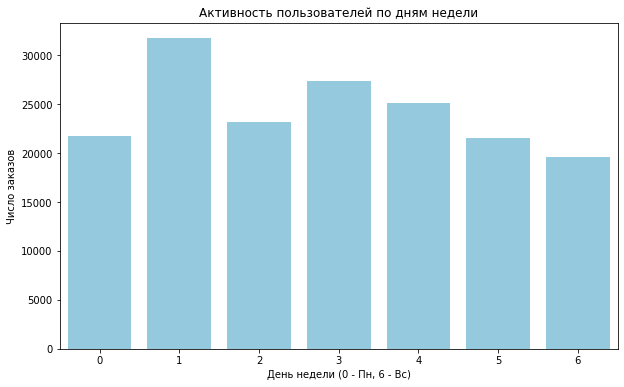

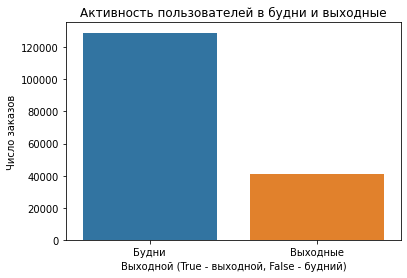

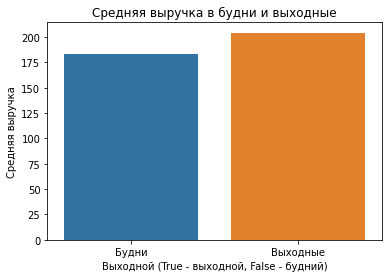


Активность по дням недели:
 day_of_week
0    21711
1    31735
2    23125
3    27393
4    25090
5    21543
6    19579
Name: order_id, dtype: int64

Активность в будни и выходные:
 is_weekend
False    129054
True      41122
Name: order_id, dtype: int64

Средняя выручка в будни и выходные:
 is_weekend
False    183.543052
True     204.306429
Name: one_ticket_revenue_rub, dtype: float64


In [180]:
# 1. Предобработка данных

# Выделяем день недели (0 - понедельник, 6 - воскресенье)
df['day_of_week'] = df['created_dt_msk'].dt.dayofweek.copy()

# Определяем, является ли день недели выходным (5 - суббота, 6 - воскресенье)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).copy()

# 2. Анализ активности по дням недели
# Группируем данные по дню недели и считаем количество заказов
weekday_activity = df.groupby('day_of_week')['order_id'].count()

# Визуализация активности по дням недели
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_activity.index, y=weekday_activity.values, color='skyblue')
plt.title('Активность пользователей по дням недели')
plt.xlabel('День недели (0 - Пн, 6 - Вс)')
plt.ylabel('Число заказов')
plt.xticks(range(7))
plt.show()

# 3. Сравнение активности в будни и выходные
# Группируем данные по признаку выходного дня и считаем количество заказов
weekend_activity = df.groupby('is_weekend')['order_id'].count()

# Визуализация активности в будни и выходные
plt.figure(figsize=(6, 4))
sns.barplot(x=weekend_activity.index, y=weekend_activity.values)
plt.title('Активность пользователей в будни и выходные')
plt.xlabel('Выходной (True - выходной, False - будний)')
plt.ylabel('Число заказов')
plt.xticks([0, 1], ['Будни', 'Выходные'])
plt.show()

# 4. Сравнение средней выручки в будни и выходные

weekday_revenue = df.groupby('is_weekend')['one_ticket_revenue_rub'].mean()

# Визуализация средней выручки в будни и выходные
plt.figure(figsize=(6, 4))
sns.barplot(x=weekday_revenue.index, y=weekday_revenue.values)
plt.title('Средняя выручка в будни и выходные')
plt.xlabel('Выходной (True - выходной, False - будний)')
plt.ylabel('Средняя выручка')
plt.xticks([0, 1], ['Будни', 'Выходные'])
plt.show()

# 5. Вывод результатов
print("\nАктивность по дням недели:\n", weekday_activity)
print("\nАктивность в будни и выходные:\n", weekend_activity)
print("\nСредняя выручка в будни и выходные:\n", weekday_revenue)

Пояснения:

1) Диаграмма "Активность пользователей по дням недели"

Диаграмма отображает активность пользователей по дням недели, выраженную в количестве заказов.

•  Наибольшая активность: наибольшее количество заказов приходится на вторник (день 1).

•  Высокая активность: четверг (день 3) и Среда (день 2) показывают достаточно высокий уровень активности.

•  Низкая активность: наименьшее количество заказов приходится на выходные (дни 5 и 6).

Выводы:

    •  Активность пользователей сильно зависит от дня недели.

    •  Наибольшая активность наблюдается в середине рабочей недели (вторник, среда, четверг).
    
    •  В выходные дни (суббота и воскресенье) активность пользователей снижается.
    
2) Диаграмма "Активность пользователей в будни и выходные"

Диаграмма сравнивает активность пользователей (в количестве заказов) в будние и выходные дни.

•  Преобладающая активность в будни: количество заказов в будние дни значительно выше, чем в выходные.

•  Низкая активность в выходные: количество заказов в выходные дни значительно меньше, чем в будние.

Выводы:

    •  Большая часть активности пользователей (по заказам) приходится на рабочие дни.

    •  В выходные дни активность пользователей значительно снижается.
    
3) Диаграмма "Средняя выручка в будни и выходные"

Диаграмма сравнивает среднюю выручку с одного заказа в будние и выходные дни.

•  Высокая выручка в выходные: средняя выручка с одного заказа в выходные дни немного выше, чем в будние.

•  Выручка в будни: средняя выручка с одного заказа в будни чуть меньше, чем в выходные.

Выводы:

    •  Хотя в будние дни совершается больше заказов, средний доход с каждого заказа в выходные дни несколько выше.

    •  Это может указывать на то, что в выходные дни пользователи склонны покупать более дорогие билеты или делать более крупные заказы.

### 3.3. Популярные события и партнёры


Анализ по регионам:
                 region_name  unique_events  total_orders  event_share  \
23        Каменевский регион           3946         47512     0.247802   
59      Североярская область           2622         20897     0.164657   
75       Широковская область            803          8739     0.050427   
56      Светополянский округ            764          4839     0.047978   
51       Речиновская область            529          3576     0.033220   
..                       ...            ...           ...          ...   
17            Залесский край              4            56     0.000251   
47      Островогорский округ              4            18     0.000251   
5          Верхозёрский край              2            11     0.000126   
55         Светолесский край              2            18     0.000126   
65  Сосноводолинская область              1             9     0.000063   

    order_share  
23     0.279229  
59     0.122812  
75     0.051359  
56     0.028439  


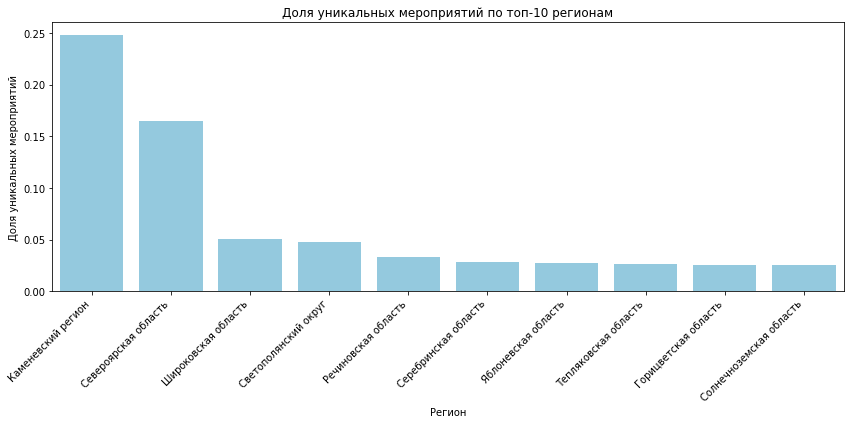

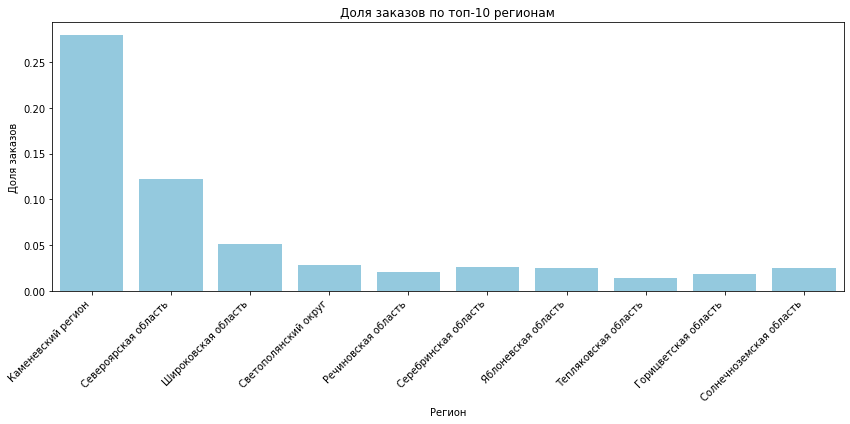

In [181]:
# 1. Подсчет уникальных мероприятий и общего числа заказов по регионам
region_summary = df.groupby('region_name')['event_id'].nunique().reset_index()
region_summary.rename(columns={'event_id': 'unique_events'}, inplace=True)
region_summary['total_orders'] = df.groupby('region_name')['order_id'].count().reset_index()['order_id']

# 2. Вычисление доли мероприятий и заказов по регионам
total_events = region_summary['unique_events'].sum()
total_orders = region_summary['total_orders'].sum()
region_summary['event_share'] = region_summary['unique_events'] / total_events
region_summary['order_share'] = region_summary['total_orders'] / total_orders

# 3. Сортировка по количеству уникальных мероприятий
region_summary = region_summary.sort_values(by='unique_events', ascending=False)

print("\nАнализ по регионам:")
print(region_summary)


# Добавляем визуализацию топ-n регионов:
n = 10

# Выбираем топ-n регионов
top_n_regions = region_summary.head(n)

# Визуализация доли мероприятий по регионам
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='event_share', data=top_n_regions, color='skyblue')
plt.title(f"Доля уникальных мероприятий по топ-{n} регионам")
plt.xlabel("Регион")
plt.ylabel("Доля уникальных мероприятий")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


# Визуализация доли заказов по регионам
plt.figure(figsize=(12, 6))
sns.barplot(x='region_name', y='order_share', data=top_n_regions, color='skyblue')
plt.title(f"Доля заказов по топ-{n} регионам")
plt.xlabel("Регион")
plt.ylabel("Доля заказов")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1) Диаграмма "Доля уникальных мероприятий по топ-10 регионам" показывает долю уникальных мероприятий в каждом из топ-10 регионов. Столбцы диаграммы отображают долю уникальных мероприятий для каждого региона. Высота столбца соответствует доле, указанной на оси Y.

Анализ:

•  Лидеры: Каменевский регион значительно выделяется, занимая самую большую долю уникальных мероприятий (около 25%). Североярская область также имеет значительную долю, но меньше, чем Каменевский регион (около 16%).

•  Остальные регионы: Остальные 8 регионов имеют значительно меньшую долю уникальных мероприятий (в диапазоне от 0.025 до 0.05).

•  Вывод: Каменевский регион является лидером по количеству уникальных мероприятий.

2) Диаграмма "Доля заказов по топ-10 регионам" отображает долю заказов, приходящихся на каждый из топ-10 регионов. Высота каждого столбца соответствует доле заказов для соответствующего региона.

Анализ:

•  Явный лидер: Каменевский регион занимает доминирующее положение, генерируя значительно большую долю заказов (около 28%), чем любой другой регион.

•  Второй по величине: Североярская область занимает второе место по доле заказов (около 12%).

•  Остальные: Доли остальных восьми регионов относительно невелики (все они ниже 0.06), что говорит о том, что основная часть заказов сосредоточена в двух лидирующих регионах.


Анализ по билетным партнерам:
              service_name  unique_events  total_orders  total_revenue  \
3       Билеты без проблем           2855         32786    15042107.84   
21             Лови билет!           3626         25871    10644953.26   
5            Билеты в руки           2474         25762     7715339.47   
24               Мой билет           1013         19682    12595098.84   
25                 Облачко           1413         15616    12459031.35   
22           Лучшие билеты           1397         12466     1742753.39   
8           Весь в билетах            608          9641    10169704.53   
26               Прачечная            728          5831     2647691.55   
30             Тебе билет!            859          3779     2223909.32   
34                  Яблоко            538          3496     2831861.44   
19            Край билетов            194          3062     3222585.25   
13            Дом культуры            192          1798     1869152.73   
15     

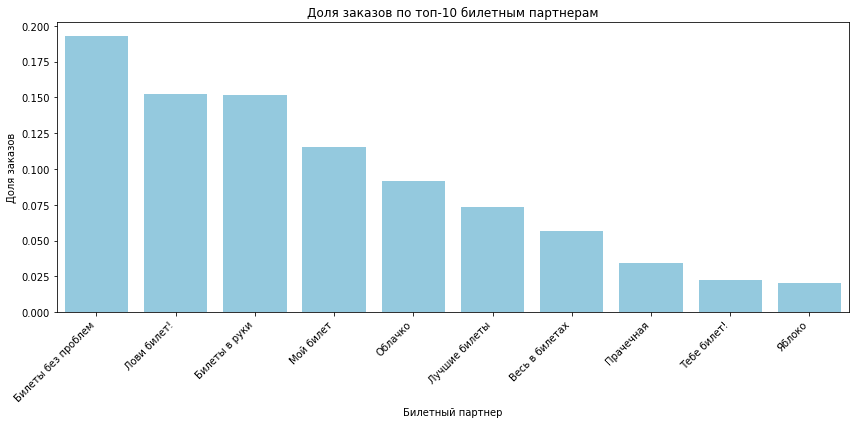

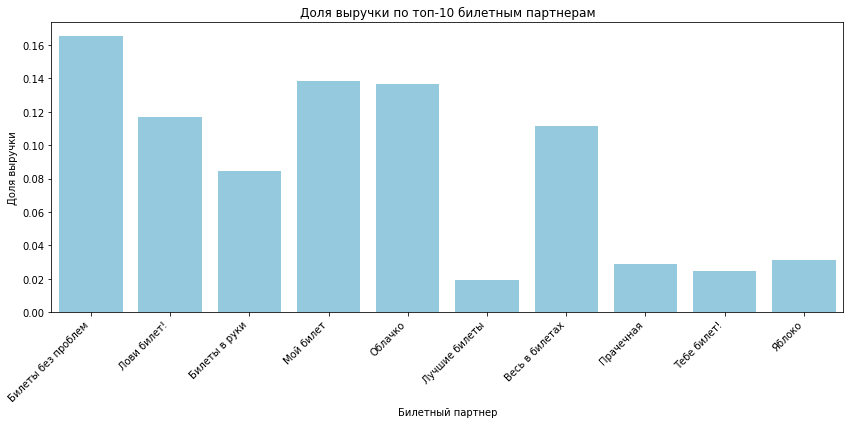

In [182]:
# 1. Подсчет уникальных мероприятий, заказов и выручки по партнерам
partner_summary = df.groupby('service_name').agg(
    unique_events=('event_id', lambda x: len(pd.unique(x))), 
    total_orders=('order_id', 'count'),                   
    total_revenue=('revenue', 'sum')                      
).reset_index()

# 2. Вычисление доли заказов и выручки по партнерам
total_orders_all = partner_summary['total_orders'].sum()
total_revenue_all = partner_summary['total_revenue'].sum()
partner_summary['order_share'] = partner_summary['total_orders'] / total_orders_all
partner_summary['revenue_share'] = partner_summary['total_revenue'] / total_revenue_all

# 3. Добавление информации о названии партнера
if 'ticket_partners' in locals():
    partner_summary = pd.merge(partner_summary, ticket_partners, on='organizers', how='left')
    partner_summary = partner_summary[['organizers', 'unique_events', 'total_orders', 'total_revenue', 'order_share', 'revenue_share']]

# 4. Сортировка по общему количеству заказов (или выручке)
partner_summary = partner_summary.sort_values(by='total_orders', ascending=False)

print("\nАнализ по билетным партнерам:")
print(partner_summary)

n = 10

# Выбираем топ-n партнеров
top_n_partners = partner_summary.head(n)

# Визуализация доли заказов по партнерам
plt.figure(figsize=(12, 6))
sns.barplot(x='service_name', y='order_share', data=top_n_partners, color='skyblue')
plt.title(f"Доля заказов по топ-{n} билетным партнерам")
plt.xlabel("Билетный партнер")
plt.ylabel("Доля заказов")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Визуализация доли выручки по партнерам
plt.figure(figsize=(12, 6))
sns.barplot(x='service_name', y='revenue_share', data=top_n_partners, color='skyblue')
plt.title(f"Доля выручки по топ-{n} билетным партнерам")
plt.xlabel("Билетный партнер")
plt.ylabel("Доля выручки")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1) Диаграмма "Доля заказов по топ-10 билетным партнерам" показывает долю заказов, приходящихся на каждого из топ-10 билетных партнеров. Высота каждого столбца соответствует доле заказов для соответствующего партнера.

Анализ:

•  Лидер: билетный партнер "Билеты без проблем" выделяется значительно, имея наибольшую долю заказов (около 19,26%).

•  Второй по величине: билетный партнер "Лови билет!" занимает второе место по доле заказов (около 15,2%).

•  Остальные: доли заказов, приходящихся на остальных 8 партнеров, относительно невелики (все они составляют примерно 11% или  меньше).

2) Диаграмма "Доля выручки по топ-10 билетным партнерам" отображает долю выручки, приходящуюся на каждого из топ-10 билетных партнеров. Высота каждого столбца соответствует доле выручки для соответствующего партнера.

Анализ:

•  Выделяющиеся партнеры: билетные партнеры "Лови билет!", "Облачко", "Мой билет" и "Весь в билетах" приносят наибольшую долю выручки (примерно от 0.015 до 0.02). Это ключевые партнеры с точки зрения генерации дохода.

•  Заметный вклад: билетный партнер "Билеты без проблем", который лидировал по доле заказов, по выручке не является лидером, занимая долю примерно 0.011.

•  Остальные: остальные партнеры приносят меньшую долю выручки (ниже 0.01). В особенности это касается "Тебе билет!" и "Лучшие билеты".

## Статистический анализ данных

Гипотеза 1: Среднее количество заказов на одного пользователя

•   Описание контекста (Обоснование выбора гипотезы): компания хочет оптимизировать маркетинговые усилия и пользовательский опыт для разных типов устройств. Предполагается, что пользователи мобильного приложения могут чаще совершать заказы из-за удобства и доступности. Проверка этой гипотезы поможет понять, стоит ли вкладывать больше ресурсов в мобильную платформу.  Например, если пользователи мобильного приложения действительно делают заказы чаще, можно сфокусироваться на улучшении мобильного UX, push-уведомлениях, и специальных акциях для мобильных пользователей.

- Нулевая гипотеза (H0): Среднее количество заказов на одного пользователя мобильного приложения *не выше*, чем среднее количество заказов на одного пользователя стационарного устройства.  mu\_mobile <= mu\_desktop
- Альтернативная гипотеза (H1): Среднее количество заказов на одного пользователя мобильного приложения *выше*, чем среднее количество заказов на одного пользователя стационарного устройства.  mu\_mobile > mu\_desktop (Односторонняя гипотеза)

Анализ и выбор теста:

1.  Сравнение двух групп: Мы сравниваем две независимые группы пользователей (мобильные и стационарные).
2.  Данные: кол-во заказов на пользователя: Данные представляют собой количество заказов для каждого пользователя, то есть, количественные данные.

3.  Исследовательский анализ данных (EDA) и проверка предположений:
    *   Визуализация распределений: *Прежде* чем выбирать статистический тест, важно изучить распределение данных в каждой группе.  Это поможет оценить, насколько вероятно, что данные соответствуют нормальному распределению, а также выявить потенциальные выбросы.  Для этого можно использовать:
        *   Гистограммы:  Показывают частоту встречаемости различных значений.
        *   Ящики с усами (Boxplots):  Показывают медиану, квартили и выбросы.
        *   Q-Q графики (Quantile-Quantile plots):  Сравнивают распределение данных с теоретическим нормальным распределением.  Если точки на графике лежат близко к прямой линии, это говорит о том, что распределение данных близко к нормальному.
    *   Формальный тест на нормальность: Для более формальной проверки можно использовать статистические тесты, такие как:
        *   Тест Шапиро-Уилка (Shapiro-Wilk test):  Один из наиболее мощных тестов на нормальность, особенно для небольших выборок.
        *   Тест Д'Агостино-Пирсона (D'Agostino-Pearson test): Хорошо работает для выборок разного размера.

4.  Выбор статистического теста:
    *   Если данные в обеих группах *нормально распределены* и имеют *примерно равные дисперсии*, можно использовать *t-тест Стьюдента для независимых выборок* (Student's t-test). T-тест является параметрическим тестом и требует соблюдения этих предположений.
    *   Если данные *не соответствуют нормальному распределению* или *дисперсии значительно различаются*, следует использовать *непараметрический тест*. В данном случае, как и в исходном варианте, мы выбираем:
        *   U-критерий Манна-Уитни (Mann-Whitney U test):  Этот тест сравнивает ранги значений в двух группах и не требует нормальности распределения. Он также менее чувствителен к выбросам, чем t-тест. *Мы выбираем U-критерий Манна-Уитни, потому что, даже если формальные тесты покажут близость к нормальному распределению, небольшое количество данных и потенциальное наличие выбросов делают этот тест более надежным.*

Решение: U-критерий Манна-Уитни (Mann-Whitney U test).  Несмотря на возможность проведения тестов на нормальность, мы выбираем U-критерий Манна-Уитни, так как он не требует нормальности распределения данных и менее чувствителен к выбросам. Учитывая небольшой размер выборки, даже при наличии формальных признаков нормальности, U-критерий

In [183]:
# 1. Подсчет количества заказов на каждого пользователя для каждого типа устройства
user_order_counts = df.groupby(['user_id', 'device_type_canonical'])['order_id'].count().reset_index()
user_order_counts.rename(columns={'order_id': 'order_count'}, inplace=True)

# 2. Определение пользователей, которые есть в обеих группах
mobile_users = user_order_counts[user_order_counts['device_type_canonical'] == 'mobile']['user_id'].unique()
desktop_users = user_order_counts[user_order_counts['device_type_canonical'] == 'desktop']['user_id'].unique()

common_users = set(mobile_users) & set(desktop_users)

print(f"Количество пользователей, использующих оба типа устройств: {len(common_users)}")

# 3. Исключение пользователей, которые есть в обеих группах
user_order_counts_filtered = user_order_counts[~user_order_counts['user_id'].isin(common_users)]

# 4. Разделение данных на группы (мобильные и стационарные)
mobile_orders = user_order_counts_filtered[user_order_counts_filtered['device_type_canonical'] == 'mobile']['order_count']
desktop_orders = user_order_counts_filtered[user_order_counts_filtered['device_type_canonical'] == 'desktop']['order_count']

# 5. Проверка U-критерием Манна-Уитни (односторонний)
u_statistic, p_value = stats.mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print("\nГипотеза 1: Среднее количество заказов на пользователя")
print(f"U-статистика: {u_statistic}")
print(f"P-значение: {p_value}")

alpha = 0.05  # Уровень значимости

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимые доказательства того, что среднее количество заказов на одного пользователя мобильного приложения выше, чем на стационарном устройстве.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств того, что среднее количество заказов на одного пользователя мобильного приложения выше, чем на стационарном устройстве.")


Количество пользователей, использующих оба типа устройств: 3274

Гипотеза 1: Среднее количество заказов на пользователя
U-статистика: 10630578.0
P-значение: 5.5459811039692874e-40
Отвергаем нулевую гипотезу. Есть статистически значимые доказательства того, что среднее количество заказов на одного пользователя мобильного приложения выше, чем на стационарном устройстве.


Гипотеза 2: Среднее время между заказами

•   Описание контекста (Обоснование выбора гипотезы): Если пользователи мобильного приложения совершают заказы чаще (как предполагает первая гипотеза), то, логично предположить, что среднее время между их заказами будет меньше. Проверка этой гипотезы важна для понимания паттернов использования разных типов устройств и разработки стратегий удержания клиентов.  Например, если выяснится, что пользователи мобильного приложения делают заказы чаще и время между их заказами меньше, то можно сфокусироваться на персонализированных предложениях, акциях и push-уведомлениях для мобильных устройств, чтобы максимизировать их вовлеченность. А для пользователей стационарных устройств можно использовать другие стратегии, чтобы стимулировать их к повторным покупкам.

- Нулевая гипотеза (H0): Среднее время между заказами пользователей мобильного приложения *не выше*, чем среднее время между заказами пользователей стационарного устройства. mu\_mobile <= mu\_desktop

- Альтернативная гипотеза (H1): Среднее время между заказами пользователей мобильного приложения *выше*, чем среднее время между заказами пользователей стационарного устройства. mu\_mobile > mu\_desktop (Односторонняя гипотеза)

**Анализ и выбор теста:**

1.  Сравнение двух групп: Мы сравниваем две независимые группы пользователей (мобильные и стационарные).
2.  Данные: время между заказами: Данные представляют собой интервалы времени, то есть, количественные данные.
3.  Исследовательский анализ данных (EDA) и проверка предположений:
    *   Визуализация распределений: *Прежде* чем выбирать статистический тест, важно изучить распределение данных в каждой группе.  Это поможет оценить, насколько вероятно, что данные соответствуют нормальному распределению, а также выявить потенциальные выбросы.  Для этого можно использовать:
        *   Гистограммы:  Показывают частоту встречаемости различных значений интервалов времени между заказами.
        *   Ящики с усами (Boxplots):  Показывают медиану, квартили и выбросы.
        *   Q-Q графики (Quantile-Quantile plots): Сравнивают распределение данных с теоретическим нормальным распределением.
    
    *   Формальный тест на нормальность: Для более формальной проверки можно использовать статистические тесты, такие как:
        *   Тест Шапиро-Уилка (Shapiro-Wilk test):
        *   Тест Д'Агостино-Пирсона (D'Agostino-Pearson test):


4.  Выбор статистического теста:
    *   Если данные в обеих группах *нормально распределены* и имеют *примерно равные дисперсии*, можно использовать *t-тест Стьюдента для независимых выборок* (Student's t-test).
    *   Если данные *не соответствуют нормальному распределению* или *дисперсии значительно различаются*, следует использовать *непараметрический тест*. В данном случае мы выбираем:
        *   U-критерий Манна-Уитни (Mann-Whitney U test):  Он сравнивает ранги значений и не требует нормальности распределения. Он также менее чувствителен к выбросам, чем t-тест. *Мы выбираем U-критерий Манна-Уитни, потому что, даже если формальные тесты покажут близость к нормальному распределению, мы ожидаем, что распределение времени между заказами будет смещено вправо, и этот тест будет более подходящим.*

Решение: U-критерий Манна-Уитни (Mann-Whitney U test). Несмотря на возможность проведения тестов на нормальность, мы выбираем U-критерий Манна-Уитни, так как распределение времени между заказами часто не является нормальным (смещено вправо). U-критерий более устойчив к таким отклонениям от нормальности.

In [184]:
# Функция для вычисления среднего времени между заказами для каждого пользователя
def calculate_avg_time_between_orders(user_orders):
    if len(user_orders) < 2:
        return None
    time_diffs = np.diff(user_orders.sort_values())
    return time_diffs.mean()

# Вычисление среднего времени между заказами для каждого пользователя и типа устройства
user_time_diffs = df.groupby(['user_id', 'device_type_canonical'])['created_dt_msk'].apply(calculate_avg_time_between_orders).reset_index()
user_time_diffs.rename(columns={'created_dt_msk': 'avg_time_between_orders'}, inplace=True)
user_time_diffs = user_time_diffs.dropna()

# Определение пользователей, которые есть в обеих группах
mobile_users = user_time_diffs[user_time_diffs['device_type_canonical'] == 'mobile']['user_id'].unique()
desktop_users = user_time_diffs[user_time_diffs['device_type_canonical'] == 'desktop']['user_id'].unique()

common_users = set(mobile_users) & set(desktop_users)

print(f"Количество пользователей, использующих оба типа устройств: {len(common_users)}")

# Исключение пользователей, которые есть в обеих группах
user_time_diffs_filtered = user_time_diffs[~user_time_diffs['user_id'].isin(common_users)]

# Разделение данных на группы (мобильные и стационарные)
mobile_time_diffs = user_time_diffs_filtered[user_time_diffs_filtered['device_type_canonical'] == 'mobile']['avg_time_between_orders']
desktop_time_diffs = user_time_diffs_filtered[user_time_diffs_filtered['device_type_canonical'] == 'desktop']['avg_time_between_orders']

# Проверка U-критерием Манна-Уитни (односторонний)
u_statistic_time, p_value_time = stats.mannwhitneyu(mobile_time_diffs, desktop_time_diffs, alternative='greater')

print("\nГипотеза 2: Среднее время между заказами")
print(f"U-статистика: {u_statistic_time}")
print(f"P-значение: {p_value_time}")

alpha = 0.05

if p_value_time < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимые доказательства того, что среднее время между заказами пользователей мобильного приложения выше, чем на стационарном устройстве.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств того, что среднее время между заказами пользователей мобильного приложения выше, чем на стационарном устройстве.")

Количество пользователей, использующих оба типа устройств: 1905

Гипотеза 2: Среднее время между заказами
U-статистика: 3487737.5
P-значение: 3.9776566629135056e-52
Отвергаем нулевую гипотезу. Есть статистически значимые доказательства того, что среднее время между заказами пользователей мобильного приложения выше, чем на стационарном устройстве.


## Общий вывод и рекомендации

Описание данных

Первый датасет final_tickets_orders_df.csv включает информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных. Поля датасета (включая добавленные в процессе работы над проектом):

- order_id — уникальный идентификатор заказа.
- user_id — уникальный идентификатор пользователя.
- created_dt_msk — дата создания заказа (московское время).
- created_ts_msk — дата и время создания заказа (московское время).
- event_id — идентификатор мероприятия из таблицы events.
- cinema_circuit — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет'.
- age_limit — возрастное ограничение мероприятия.
- currency_code — валюта оплаты, например rub для российских рублей.
- device_type_canonical — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для 
стационарных.
- revenue — выручка от заказа.
- service_name — название билетного оператора.
- tickets_count — количество купленных билетов.
- total — общая сумма заказа.
- one_ticket_revenue_rub — выручка с одного заказа.
- month — месяц оформления заказа.
- season — сезон оформления заказа.

Второй датасет final_tickets_events_df содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия. Обратите внимание, что из данных исключили фильмы, ведь, как было видно на дашборде, событий такого типа не так много. Датасет содержит такие поля:

- event_id — уникальный идентификатор мероприятия.
- event_name — название мероприятия. Аналог поля event_name_code из исходной базы данных.
- event_type_description — описание типа мероприятия.
- event_type_main — основной тип мероприятия: театральная постановка, концерт и так далее.
- organizers — организаторы мероприятия.
- region_name — название региона.
- city_name — название города.
- venue_id — уникальный идентификатор площадки.
- venue_name — название площадки.
- venue_address — адрес площадки.

В процессе работы над проектом вся выручка была переведена в российские рубли для удобства анализа.


I. Общие выводы по проекту:

•   Сезонность и предпочтения по типу мероприятий:

    *   Наблюдается четко выраженная сезонность: количество заказов значительно возрастает в осенние месяцы (сентябрь-октябрь), с пиком в октябре.
    
    *   Летние и осенние периоды характеризуются различиями в предпочтениях по типам мероприятий: концерты популярны летом, в то время как театр и спорт - осенью. Мероприятия, не входящие в конкретную категорию ("другое"), пользуются стабильным спросом в течение всего года. Ёлки больше пользуются спросом осенью.
    
    *   Возрастной рейтинг также влияет на популярность мероприятий в разное время года. Мероприятия с рейтингом 0 пользуются наибольшим спросом осенью, а мероприятия с рейтингом 16 - как летом, так и осенью.
    
•   Тип устройства и активность пользователей:

    *   Подавляющее большинство заказов совершается с мобильных устройств, как летом, так и осенью.
    
    *   Активность пользователей в будни значительно выше, чем в выходные.
    
    *   Средняя выручка с заказа в выходные дни немного выше, чем в будние.
    
•   Ценовая политика:

    *   Средняя стоимость билета относительно стабильна в течение осеннего периода, но с небольшими колебаниями.
    
•  Подтвержденные гипотезы:

    *   Среднее количество заказов на одного пользователя мобильного приложения статистически значимо выше, чем на стационарном устройстве.
    
    *   Среднее время между заказами пользователей мобильного приложения статистически значимо выше, чем на стационарном устройстве.

II. Общие рекомендации:

•   Маркетинговые стратегии с учетом сезонности:
    
    *   Разработать маркетинговые кампании, ориентированные на продвижение концертов летом и театральных и спортивных мероприятий осенью.
    
    *   Предлагать скидки и акции на мероприятия с рейтингом 0 в осенний период.
    
    *   Готовиться к пиковому спросу в октябре, планируя рекламные акции и обеспечивая наличие билетов на популярные мероприятия.
    
•   Оптимизация мобильного приложения:

    *   Учитывая высокую активность пользователей мобильных устройств, необходимо постоянно оптимизировать и улучшать мобильное приложение.
    
    *   Сделать акцент на удержании мобильных пользователей, так как они совершают заказы реже, чем пользователи на десктопе.
    
    *   Разработать целевые рекламные кампании для привлечения пользователей мобильного приложения и стимулирования их активности.
    
•   Стимулирование активности в выходные дни:
    
    *   Предлагать специальные скидки и акции на мероприятия, проходящие в выходные дни, чтобы стимулировать активность пользователей.
    
    *   Увеличить ассортимент мероприятий, подходящих для посещения в выходные (например, семейные мероприятия, детские представления).
    
•   Анализ ценовой политики:
    
    *   Постоянно мониторить среднюю стоимость билета и адаптировать ценовую политику в зависимости от спроса, типа мероприятия и сезона.
    
    *   Предлагать гибкие цены, адаптированные к активности пользователей (например, скидки в будни).
    
•   Таргетирование рекламы:
    
    *   Разрабатывать таргетированные рекламные кампании на основе предпочтений пользователей (тип устройства, тип мероприятия, возрастные ограничения) и времени года.
    
    *   Использовать ремаркетинг для возврата пользователей, которые давно не совершали заказы.
    
• Категория "Другое":

    * Проанализировать, какие события входят в категорию Другое, возможно ее следует декомпозировать, или продвигать, потому что есть хороший трафик по этой категории.